### Table of contents
01. Importing Libraries and Importing Data Set
02. Cleaning 
03. Elbow Method to assess number of clusters
04. Applying kmeans with the cluster recomendation from the elbow method
05. Plotting clusters and examining data


# 01. Importing Libraries and Data Sets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# cleaned flight data with all NaN values removed which inadvertantly removes all cancelled and diverted flights. Delays can still be assessed
delays = pd.read_csv('/Users/tuor/DA Projects/230523 Airline January 2023 Project/02 Data/Prepared Data/230616 2019 delayed with flight time.csv')

In [4]:
pd.set_option('display.max_columns', None)

# 02. Cleaning

In [5]:
# reviewing data imported
delays

,Unnamed: 0,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,DISTANCE,ORIGIN_CITY,ORIGIN_STATE_OR_REGION,ORIGIN_FULL_NAME,GMT_DEP,DEST_CITY,DEST_STATE_OR_REGION,DEST_FULL_NAME,GMT_ARR,dep_hour,arr_hour,flt_time_min,ORIGIN/DEST
0,0,1,2,9E,9E,N8688C,3280,GNV,ATL,601,0.0,0600-0659,722,0.0,300.0,Gainesville,FL,Florida,5,Atlanta,GA,Georgia,5,6,7,81.0,GNVATL
1,1,1,2,9E,9E,N348PQ,3281,MSP,CVG,1359,0.0,1400-1459,1633,0.0,596.0,Minneapolis,MN,Minnesota,6,Cincinnati,OH,Ohio,5,13,16,94.0,MSPCVG
2,2,1,2,9E,9E,N8896A,3282,DTW,CVG,1215,0.0,1200-1259,1329,0.0,229.0,Detroit,MI,Michigan,5,Cincinnati,OH,Ohio,5,12,13,74.0,DTWCVG
3,3,1,2,9E,9E,N8886A,3283,TLH,ATL,1521,0.0,1500-1559,1625,0.0,223.0,Tallahassee,FL,Florida,5,Atlanta,GA,Georgia,5,15,16,64.0,TLHATL
4,4,1,2,9E,9E,N8974C,3284,ATL,FSM,1847,0.0,1900-1959,1940,0.0,579.0,Atlanta,GA,Georgia,5,Fort Smith,AR,Arkansas,6,18,19,113.0,ATLFSM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612556,612556,31,4,UA,UA,N776UA,200,GUM,HNL,749,0.0,0700-0759,1832,0.0,3801.0,Tamuning,Guam,Guam,10,Honolulu,"Oahu, HI",Hawaii,10,7,18,643.0,GUMHNL
612557,612557,31,4,UA,UA,N36280,174,GUM,SPN,717,0.0,0700-0759,759,0.0,129.0,Tamuning,Guam,Guam,10,Saipan,Northern Mariana Islands,NaN,10,7,7,42.0,GUMSPN
612558,612558,31,4,UA,UA,N36280,117,SPN,GUM,857,0.0,0900-0959,933,0.0,129.0,Saipan,Northern Mariana Islands,NaN,10,Tamuning,Guam,Guam,10,8,9,36.0,SPNGUM
612559,612559,31,4,UA,UA,N39726,105,SPN,GUM,1820,0.0,1800-1859,1854,0.0,129.0,Saipan,Northern Mariana Islands,NaN,10,Tamuning,Guam,Guam,10,18,18,34.0,SPNGUM


In [6]:
# removing secondary index column
delays = delays.drop(['Unnamed: 0'],axis=1)

In [7]:
# grabbing only relavent numerical data
delays_num = delays[['DAY_OF_MONTH','DAY_OF_WEEK','DEP_TIME', 'ARR_TIME', 'DISTANCE', 'flt_time_min']]
# delays_num = delays[['DISTANCE', 'flt_time_min']]

# 03. Elbow Method to assess number of clusters

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(delays_num).score(delays_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-532213521095.79443,
 -336231623679.7063,
 -218052486921.4478,
 -179835798199.53436,
 -147228175794.28082,
 -124296375582.21463,
 -104217846069.0857,
 -92597625058.91776,
 -82307451498.32632]

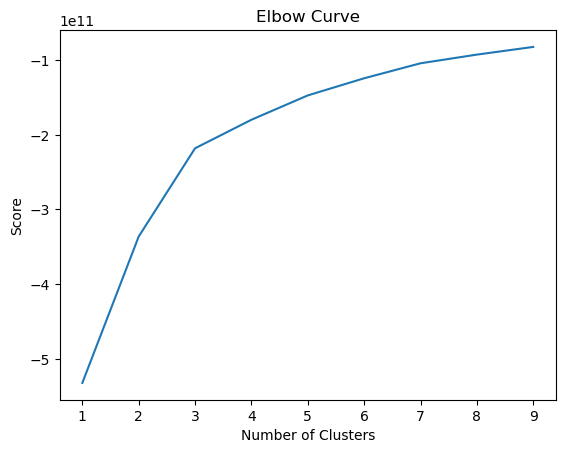

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Massive jump from 2 to 3 and curve begins to flatten out, though a little dramatically. Will start with 3 clusters.

# 04. Applying kmeans with the cluster recomendation from the elbow method

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [12]:
delays_num['clusters'] = kmeans.fit_predict(delays_num)

/var/folders/lr/bnypmrgd10lfz8x9hx1x8w9w0000gn/T/ipykernel_4181/2353659519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_num['clusters'] = kmeans.fit_predict(delays_num)


In [13]:
delays_num.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,ARR_TIME,DISTANCE,flt_time_min,clusters
0,1,2,601,722,300.0,81.0,0
1,1,2,1359,1633,596.0,94.0,1
2,1,2,1215,1329,229.0,74.0,0
3,1,2,1521,1625,223.0,64.0,1
4,1,2,1847,1940,579.0,113.0,1


# 05. Plotting clusters and examining data

In [14]:
delays_num['clusters'].value_counts()

0    266776
1    256892
2     88893
Name: clusters, dtype: int64

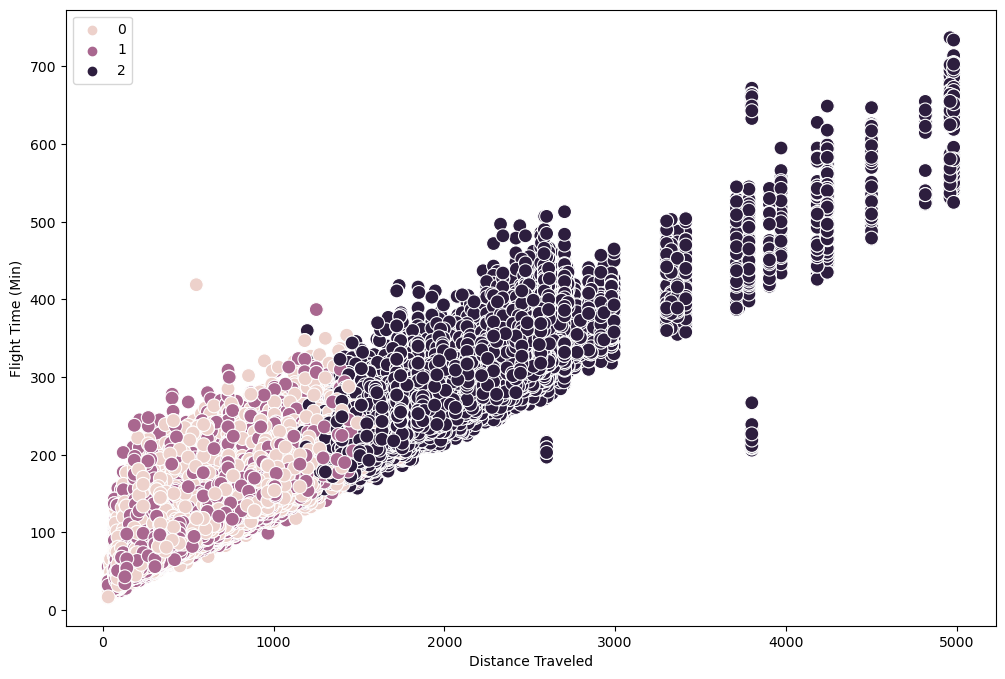

In [15]:
# Plot the clusters for the "Distance" and "Flight time in min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=delays_num['DISTANCE'], y=delays_num['flt_time_min'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance Traveled') # Label x-axis.
plt.ylabel('Flight Time (Min)') # Label y-axis.
plt.show()

Dark Purple holds the widest spread and greatest distances
Pink and Purple are highly concentrated in shorter range flights and are the largest groups. If nothing else it shows that the vast majority of flights occur below 1500 miles.

/Users/tuor/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


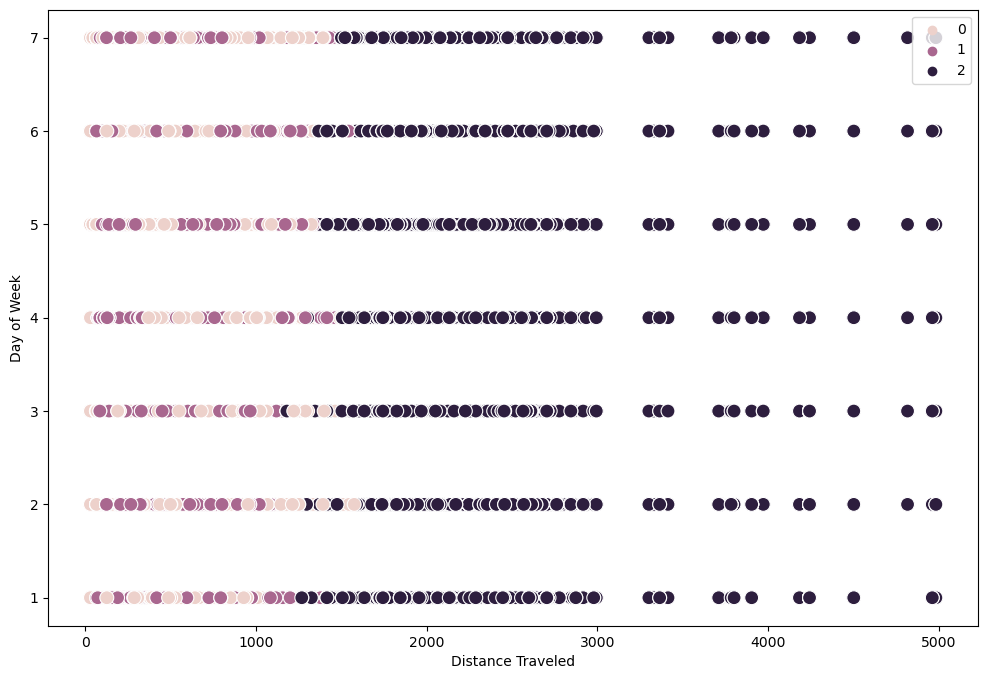

In [16]:
# Plot the clusters for the "Distance" and "Flight time in min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=delays_num['DISTANCE'], y=delays_num['DAY_OF_WEEK'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance Traveled') # Label x-axis.
plt.ylabel('Day of Week') # Label y-axis.
plt.show()

The groups seem to be pretty evenly spread across days of the week

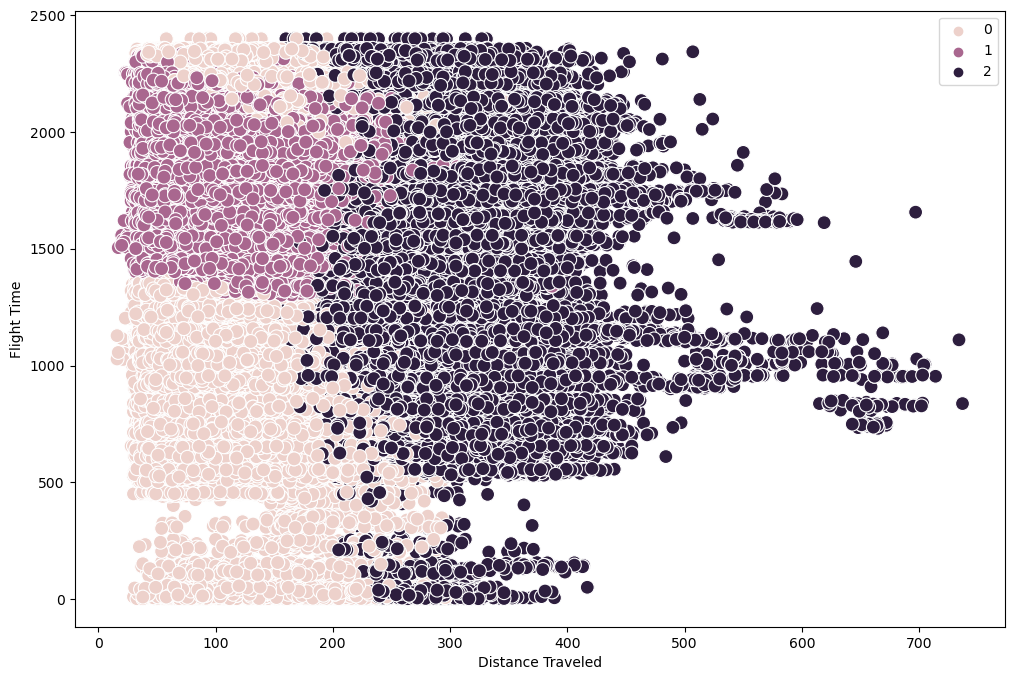

In [22]:
# Plot the clusters for the "Distance" and "Flight time in min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=delays_num['flt_time_min'], y=delays_num['DEP_TIME'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance Traveled') # Label x-axis.
plt.ylabel('Flight Time') # Label y-axis.
plt.show()

Since purple is one of the largest groups it is easy to see that the concentration of flights is between 1500 and 2300 and is shorter flights largerly. Longer flights seem to leave at all times and there is clearly few to no flights in the 3-4am time. Extreme distance seem to only fly after 10am as well.

/Users/tuor/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


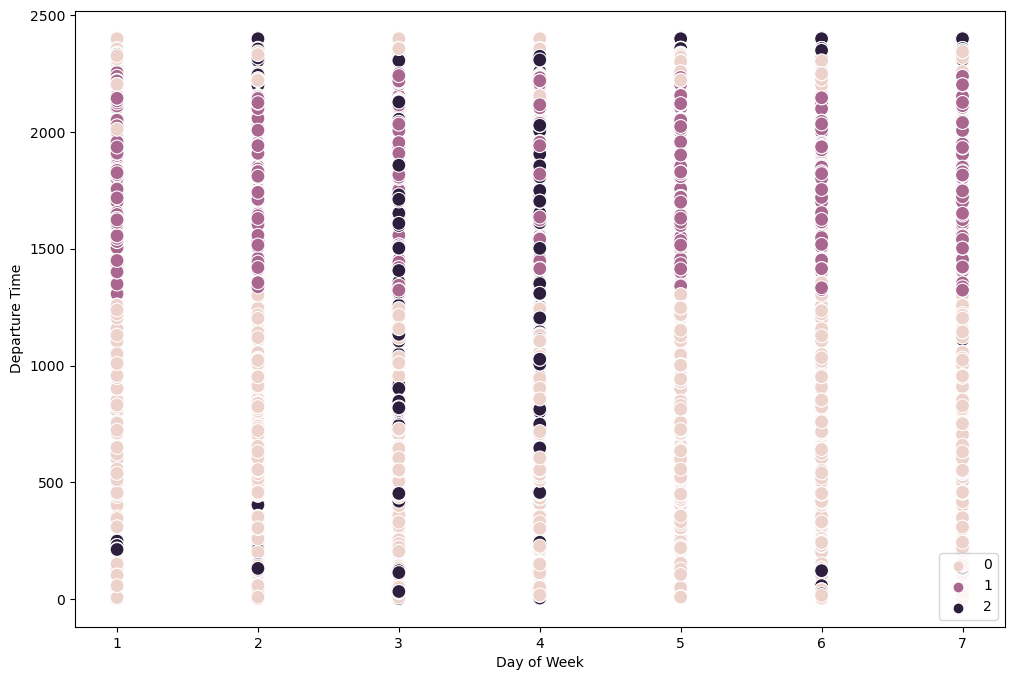

In [18]:
# Plot the clusters for the "Distance" and "Flight time in min" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=delays_num['DAY_OF_WEEK'], y=delays_num['DEP_TIME'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Day of Week') # Label x-axis.
plt.ylabel('Departure Time') # Label y-axis.
plt.show()

Judging by dark purples spread I would say that most days of the week long distance flights occur at extreme times except on day 3 and 4. Given the previous grouping these flights include a large numer of the 1500-2000 mile flights.

In [19]:
delays_num.loc[delays_num['clusters'] == 2, 'cluster'] = 'dark purple'
delays_num.loc[delays_num['clusters'] == 1, 'cluster'] = 'purple'
delays_num.loc[delays_num['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/lr/bnypmrgd10lfz8x9hx1x8w9w0000gn/T/ipykernel_4181/3114340285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delays_num.loc[delays_num['clusters'] == 2, 'cluster'] = 'dark purple'


In [20]:
delays_num.groupby('cluster').agg({'DAY_OF_MONTH':['mean', 'median'], 
                         'DAY_OF_WEEK':['mean', 'median'], 
                         'DEP_TIME':['mean', 'median'],
                          'ARR_TIME':['mean', 'median'],
                          'DISTANCE': ['mean', 'median'],
                          'flt_time_min':['mean', 'median']})

DAY_OF_MONTH        DAY_OF_WEEK            DEP_TIME          \
                    mean median        mean median         mean  median   
cluster                                                                   
dark purple    15.480623   15.0    3.890261    4.0  1307.911275  1250.0   
pink           15.742511   16.0    3.829340    4.0   952.083160   925.0   
purple         15.745391   16.0    3.841883    4.0  1733.041286  1730.0   

                ARR_TIME             DISTANCE         flt_time_min         
                    mean  median         mean  median         mean median  
cluster                                                                    
dark purple  1508.868797  1555.0  1926.696613  1781.0   271.852418  262.0  
pink         1050.143727  1059.0   610.015968   569.0   117.411934  112.0  
purple       1924.437904  1922.0   603.988991   563.0   114.995718  109.0

In [21]:
# ML data exporting to .csv
delays_num.to_csv('/Users/tuor/DA Projects/230804 2019 ML Unspervised Data.csv')